# Exploración Fichas Vacas Hato

Este reporte presenta la exploración de los datasets del hato de vacas. La información utilizada pertenece al CAETEC y corresponde a registros históricos de todas las vacas que se encuentran bajo su gobernanza.

El propósito de este reporte es lograr una comprensión clara de los datos, su calidad, su formato y las posibles transformaciones necesarias.

## Librerías Utilizadas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Google Drive
from google.colab import drive

## Sistema Operativo
import os

## Importación de los datos

Los datos importados solo pueden ser accesados por miembros del equipo Vacas Saturno Saturnitas, por lo que su consulta se realiza exclusivamente a través de carpetas protegidas en Google Drive.

Para obtener acceso, es necesario contactar a los miembros del equipo.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
registers_path = '/content/drive/MyDrive/Vacas/Ficha Vacas HATO'
print(f"Ruta de registros actualizada a: {registers_path}")

Ruta de registros actualizada a: /content/drive/MyDrive/Vacas/Ficha Vacas HATO


Dentro de la carpeta se identifican varios archivos correspondientes a registros de fichas de vacas.

In [ ]:
excel_files = []
for file in os.listdir(registers_path):
    if file.endswith(('.csv', '.xls')):
        excel_files.append(file)

print(f"Archivos Excel encontrados en '{registers_path}':")
if excel_files:
    for excel_file in excel_files:
        print(excel_file)

Archivos Excel encontrados en '/content/drive/MyDrive/Vacas/Ficha Vacas HATO':
Eventos de animales 1242.csv
Eventos de animales 1236.csv
Eventos de animales 1613.csv
Eventos de animales 1522.csv
Eventos de animales 2074.csv
Eventos de animales 1235.csv
Eventos de animales 1523.csv
Eventos de animales 2128.csv
Eventos de animales 2085.csv
Eventos de animales 8773.csv
Eventos de animales 1515.csv
Eventos de animales 8743.csv
Eventos de animales 1219.csv
Eventos de animales 8732.csv
Eventos de animales 1203.csv
Eventos de animales 2140.csv
Eventos de animales 1502.csv
Eventos de animales 1593.csv
Eventos de animales 8736.csv
Eventos de animales 8714.csv
Eventos de animales 2108.csv
Eventos de animales 2119.csv
Eventos de animales 1532.csv
Eventos de animales 1638.csv
Eventos de animales 1567.csv
Eventos de animales 8738.csv
Eventos de animales 8712.csv
Eventos de animales 8781.csv
Eventos de animales 8755.csv
Eventos de animales 8703.csv
Eventos de animales 2100.csv
Eventos de animales 87

Se están considerando todos los archivos de las fichas. Esto implica que los datos analizados provienen de todas las vacas del CAETEC, por lo que no se tiene congruencia con los datos obtenidos de los registros de ordeño para las vacas con mayor longevidad o estancia del CAETEC.

In [ ]:
excel_files = []

for excel_file in os.listdir(registers_path):
    file_path = os.path.join(registers_path, excel_file)
    df = None
    if excel_file.endswith('.csv'):
        try:
            df = pd.read_csv(file_path)
        except Exception as e:
            print(f"Error reading CSV file {excel_file}: {e}")
            continue
    elif excel_file.endswith(('.xls', '.xlsx')):
        try:
            df = pd.read_excel(file_path, engine='openpyxl')
        except OSError as e:
            print(f"Warning: {excel_file} could not be read as Excel (Error: {e}). Trying as CSV...")
            try:
                df = pd.read_csv(file_path)
            except Exception as e_csv:
                print(f"Error reading {excel_file} as CSV: {e_csv}")
                continue
        except Exception as e:
            print(f"Error reading Excel file {excel_file}: {e}")
            continue
    else:
        print(f"Skipping unknown file type: {excel_file}")
        continue

    if df is not None:
        excel_files.append(excel_file)
        print(f"Tamaño del archivo {excel_file}: {len(df)} filas")

print(f"\nTotal de archivos procesados y agregados: {len(excel_files)}")

Tamaño del archivo Eventos de animales 1242.csv: 61 filas
Tamaño del archivo Eventos de animales 1236.csv: 83 filas
Tamaño del archivo Eventos de animales 1613.csv: 133 filas
Tamaño del archivo Eventos de animales 1522.csv: 31 filas
Tamaño del archivo Eventos de animales 2074.csv: 109 filas
Tamaño del archivo Eventos de animales 1235.csv: 66 filas
Tamaño del archivo Eventos de animales 1523.csv: 23 filas
Tamaño del archivo Eventos de animales 2128.csv: 91 filas
Tamaño del archivo Eventos de animales 2085.csv: 79 filas
Tamaño del archivo Eventos de animales 8773.csv: 47 filas
Tamaño del archivo Eventos de animales 1515.csv: 24 filas
Tamaño del archivo Eventos de animales 8743.csv: 47 filas
Tamaño del archivo Eventos de animales 1219.csv: 78 filas
Tamaño del archivo Eventos de animales 8732.csv: 50 filas
Tamaño del archivo Eventos de animales 1203.csv: 75 filas
Tamaño del archivo Eventos de animales 2140.csv: 79 filas
Tamaño del archivo Eventos de animales 1502.csv: 35 filas
Tamaño del a

Al mostrar el primer registro, observamos que varias columnas contienen datos en formato de texto. Esto sugiere la necesidad de transformar estas variables para permitir un análisis más profundo de las descripciones, tipos de evento y comentarios. Además, columnas como Evento y Usuario resultan irrelevantes para el análisis, ya que no aportan información útil.

Para el análisis exploratorio, se integrarán los distintos datasets con el fin de obtener un mayor contexto de la información. Posteriormente, durante la fase de transformación, se construirá un pipeline completo para la limpieza y generación de nuevos datasets.

In [ ]:
excel_file_example = excel_files[0]
df_example = pd.read_csv(os.path.join(registers_path, excel_file_example))
df_example.head()

,Evento,Tipo de evento,Fecha del evento,Descripción,Usuario,Comentario
0,NaN,Cambio tabla alimentación,12/09/2025,Primerizas-ProduccionLeche ->,User1,NaN
1,NaN,Secado,12/09/2025,Dry Off,User1,"SE SECO CON 362 DEL, 14.27 LITROS, 175 DCC, QU..."
2,NaN,Cambio de grupo,12/09/2025,"3, VMS 3 -> 100, SECAS",User1,NaN
3,NaN,Diagnósticos/Tratamiento,12/09/2025,Dns: Secado por baja; Loc.: DD; Trat: CEFA SAF...,User1,NaN
4,NaN,Diagnósticos/Tratamiento,12/09/2025,Dns: VACUNA; Loc.: DD; Trat: starvacc; Med: ST...,User1,NaN


## Observaciones

Analizando los datos a primera vista, podemos ver que el tipo de evento y la fecha son datos estáticos, esto quiere decir que no está abierto a redacción humana, sino que el mismo sistema asigna datos predeterminados. La descripción y los comentarios, por otro lado, pueden ser redactados por una persona que está usando el sistema, por lo que se deben de limpiar para un mejor análisis

In [ ]:
all_event_dataframes = []

# Define columns to drop for event files, as previously identified
columns_to_drop_events = [
    'Evento',
    'Usuario',
]

if excel_files:
    for file_name in excel_files:
        file_path = os.path.join(registers_path, file_name)
        df_event = None

        # Robust file reading logic (copied from A4kOB7nygYHx)
        if file_name.endswith('.csv'):
            try:
                df_event = pd.read_csv(file_path)
            except Exception as e:
                print(f"Error reading CSV file {file_name}: {e}. Skipping.")
                continue
        elif file_name.endswith(('.xls', '.xlsx')):
            try:
                df_event = pd.read_excel(file_path, engine='openpyxl')
            except OSError as e:
                print(f"Warning: {file_name} could not be read as Excel (Error: {e}). Trying as CSV...")
                try:
                    df_event = pd.read_csv(file_path)
                except Exception as e_csv:
                    print(f"Error reading {file_name} as CSV: {e_csv}. Skipping.")
                    continue
            except Exception as e:
                print(f"Error reading Excel file {file_name}: {e}. Skipping.")
                continue
        else:
            print(f"Skipping unknown file type: {file_name}")
            continue

        if df_event is not None:
            # Apply transformations for event files
            # Drop irrelevant columns if they exist
            df_event.drop(columns=[col for col in columns_to_drop_events if col in df_event.columns], errors='ignore', inplace=True)

            # Convert 'Fecha del evento' to datetime, handling potential errors
            if 'Fecha del evento' in df_event.columns:
                df_event['Fecha del evento'] = pd.to_datetime(df_event['Fecha del evento'], errors='coerce', dayfirst=True)

            all_event_dataframes.append(df_event)

    if all_event_dataframes:
        analysis = pd.concat(all_event_dataframes, ignore_index=True)
        print("\nDataFrame 'analysis' (event files) creado con éxito.")
        print(f"Dimensiones del DataFrame 'analysis': {analysis.shape}")
        print("\nPrimeras 5 filas del DataFrame 'analysis':")
        display(analysis)
        print("\nInformación del DataFrame 'analysis':")
        analysis.info()
    else:
        print("No se pudieron cargar DataFrames de eventos para concatenar.")
else:
    print("No se encontraron archivos para procesar.")


DataFrame 'analysis' (event files) creado con éxito.
Dimensiones del DataFrame 'analysis': (19660, 4)

Primeras 5 filas del DataFrame 'analysis':


,Tipo de evento,Fecha del evento,Descripción,Comentario
0,Cambio tabla alimentación,2025-09-12,Primerizas-ProduccionLeche ->,NaN
1,Secado,2025-09-12,Dry Off,"SE SECO CON 362 DEL, 14.27 LITROS, 175 DCC, QU..."
2,Cambio de grupo,2025-09-12,"3, VMS 3 -> 100, SECAS",NaN
3,Diagnósticos/Tratamiento,2025-09-12,Dns: Secado por baja; Loc.: DD; Trat: CEFA SAF...,NaN
4,Diagnósticos/Tratamiento,2025-09-12,Dns: VACUNA; Loc.: DD; Trat: starvacc; Med: ST...,NaN
...,...,...,...,...
19655,Control de Gestación,2019-08-08,+,NaN
19656,Inseminación,2019-06-08,Effective Insemination \nArtificial Inseminati...,NaN
19657,Celo,2019-06-08,Monta en otras,NaN
19658,Diagnósticos/Tratamiento,2019-03-25,Dns: VACUNA; Loc.: DD; Trat: CATTLE MASTER GOL...,NaN



Información del DataFrame 'analysis':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19660 entries, 0 to 19659
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tipo de evento    19660 non-null  object        
 1   Fecha del evento  19660 non-null  datetime64[ns]
 2   Descripción       19647 non-null  object        
 3   Comentario        3766 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 614.5+ KB


## Eventos

Al visualizar los eventos registrados para cada vaca, es posible identificar que estos pueden agruparse en tres grandes categorías: eventos reproductivos, eventos de salud y eventos logísticos. Para los fines del análisis, los eventos más relevantes son los reproductivos y los de salud, ya que proporcionan información directa sobre el estado fisiológico y sanitario de la vaca. Estos eventos permiten detectar patrones, identificar posibles problemas y comprender mejor los factores que influyen en su desempeño productivo.

In [ ]:
print("\n--- Resumen General ---")
print(f"Período de datos: {analysis['Fecha del evento'].min()} a {analysis['Fecha del evento'].max()}")
print(f"Total de eventos registrados: {len(analysis)}")
print(f"Tipos de eventos únicos: {analysis['Tipo de evento'].nunique()}")

print("\n--- Frecuencia de Eventos por Tipo ---")
eventos_count = analysis['Tipo de evento'].value_counts()
print(eventos_count)



--- Resumen General ---
Período de datos: 2015-08-30 00:00:00 a 2025-11-14 00:00:00
Total de eventos registrados: 19660
Tipos de eventos únicos: 20

--- Frecuencia de Eventos por Tipo ---
Tipo de evento
Invitación Visita Veterinaria     3777
Diagnósticos/Tratamiento          3598
Cambio de grupo                   2660
Control de Gestación              2323
Celo                              1912
Inseminación                      1694
Cambio tabla alimentación         1386
Condición corporal                 551
Parto                              491
Cambio ID Transponder              403
Secado                             312
Entrada                            214
Peso                               192
Cambio de medidor de actividad      70
Aborto                              35
Notas                               21
Cita de vacunación                   8
Cambio ID                            7
Temperatura Rectal                   5
Revisión del estado de Salud         1
Name: count, dty

### Eventos Reproductivos

Dentro de los eventos reproductivos, el control de gestación es el más frecuente, seguido por los eventos de celo, inseminación, parto, secado, entrada y aborto.

/tmp/ipython-input-2816497881.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reproductive_event_counts.values, y=reproductive_event_counts.index, palette='viridis')


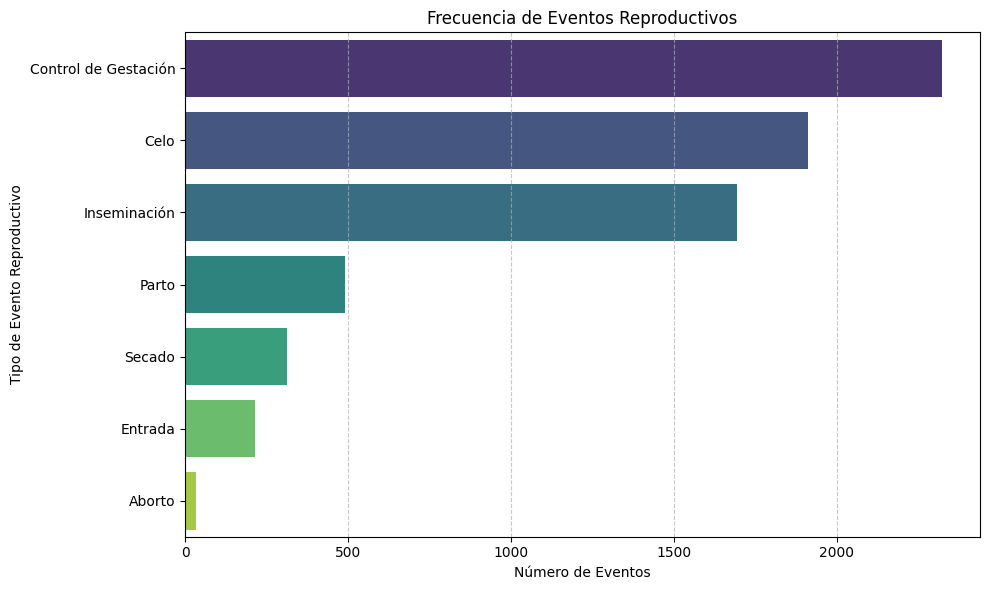

In [ ]:
eventos_reproductivos = analysis[analysis['Tipo de evento'].isin([
  'Control de Gestación',
  'Celo',
  'Inseminación',
  'Parto',
  'Secado',
  'Entrada',
  'Aborto',
])]

reproductive_event_counts = eventos_reproductivos['Tipo de evento'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=reproductive_event_counts.values, y=reproductive_event_counts.index, palette='viridis')
plt.title('Frecuencia de Eventos Reproductivos')
plt.xlabel('Número de Eventos')
plt.ylabel('Tipo de Evento Reproductivo')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Eventos de Salud

En los eventos de salud se observa que las invitaciones a visitas veterinarias son las más frecuentes, seguidas por los diagnósticos y tratamientos, cambios en la tabla de alimentación, evaluación de la condición corporal, registro de peso, citas de vacunación, temperatura rectal y revisión del estado de salud.

Dado que las columnas de cita de vacunación, temperatura rectal y revisión del estado de salud presentan muy pocos datos, pueden eliminarse del dataset, ya que no aportan información relevante para el análisis.

/tmp/ipython-input-3363439081.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_event_counts.values, y=health_event_counts.index, palette='magma')


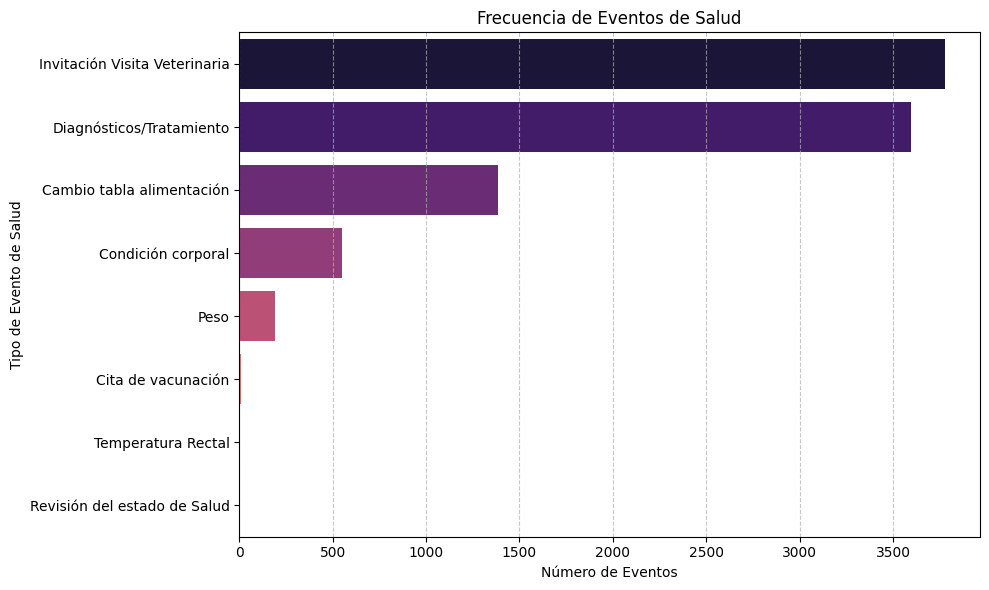

In [ ]:
eventos_salud = analysis[analysis['Tipo de evento'].isin([
    'Invitación Visita Veterinaria',
    'Diagnósticos/Tratamiento',
    'Cambio tabla alimentación',
    'Condición corporal',
    'Peso',
    'Cita de vacunación',
    'Temperatura Rectal',
    'Revisión del estado de Salud',
])]

health_event_counts = eventos_salud['Tipo de evento'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=health_event_counts.values, y=health_event_counts.index, palette='magma')
plt.title('Frecuencia de Eventos de Salud')
plt.xlabel('Número de Eventos')
plt.ylabel('Tipo de Evento de Salud')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Análisis de secado

Los comentarios asociados a los eventos de secado contienen información relevante sobre los días en leche, el promedio de litros producidos antes del secado y la cantidad de inseminaciones necesarias para que la vaca quedara gestante.


ANÁLISIS DETALLADO DE SECADOS
Total de secados: 312

--- ESTADÍSTICAS DE SECADO ---

 Días en Leche (DEL):
   - Promedio: 346.0 días
   - Mediana: 336.0 días
   - Mínimo: 187 días
   - Máximo: 737 días
   - Desviación estándar: 71.3 días
   - Datos válidos: 209/312 (67.0%)

 Producción al Secado:
   - Promedio: 26.03 litros
   - Mediana: 24.24 litros
   - Mínimo: 2.00 litros
   - Máximo: 367.00 litros
   - Desviación estándar: 25.37 litros
   - Datos válidos: 202/312 (64.7%)

 Conteo de Células Somáticas (DCC):
   - Promedio: 184 mil células/ml
   - Mediana: 188 mil células/ml
   - Mínimo: 52 mil células/ml
   - Máximo: 437 mil células/ml
   - Desviación estándar: 41.8 mil células/ml
   - Datos válidos: 205/312 (65.7%)

   Clasificación por calidad (DCC):
   - Excelente (<100): 11 (5.4%)
   - Buena (100-200): 128 (62.4%)
   - Regular (200-400): 65 (31.7%)
   - Mala (>400): 1 (0.5%)

 Servicios por Concepción:
   - Promedio: 2.95 inseminaciones
   - Mediana: 2.0 inseminaciones
   - Mín

/tmp/ipython-input-2051828048.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secados[['DEL_extraido', 'Litros_extraido', 'DCC_extraido', 'Num_Inseminaciones']] = \
/tmp/ipython-input-2051828048.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secados[['DEL_extraido', 'Litros_extraido', 'DCC_extraido', 'Num_Inseminaciones']] = \
/tmp/ipython-input-2051828048.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

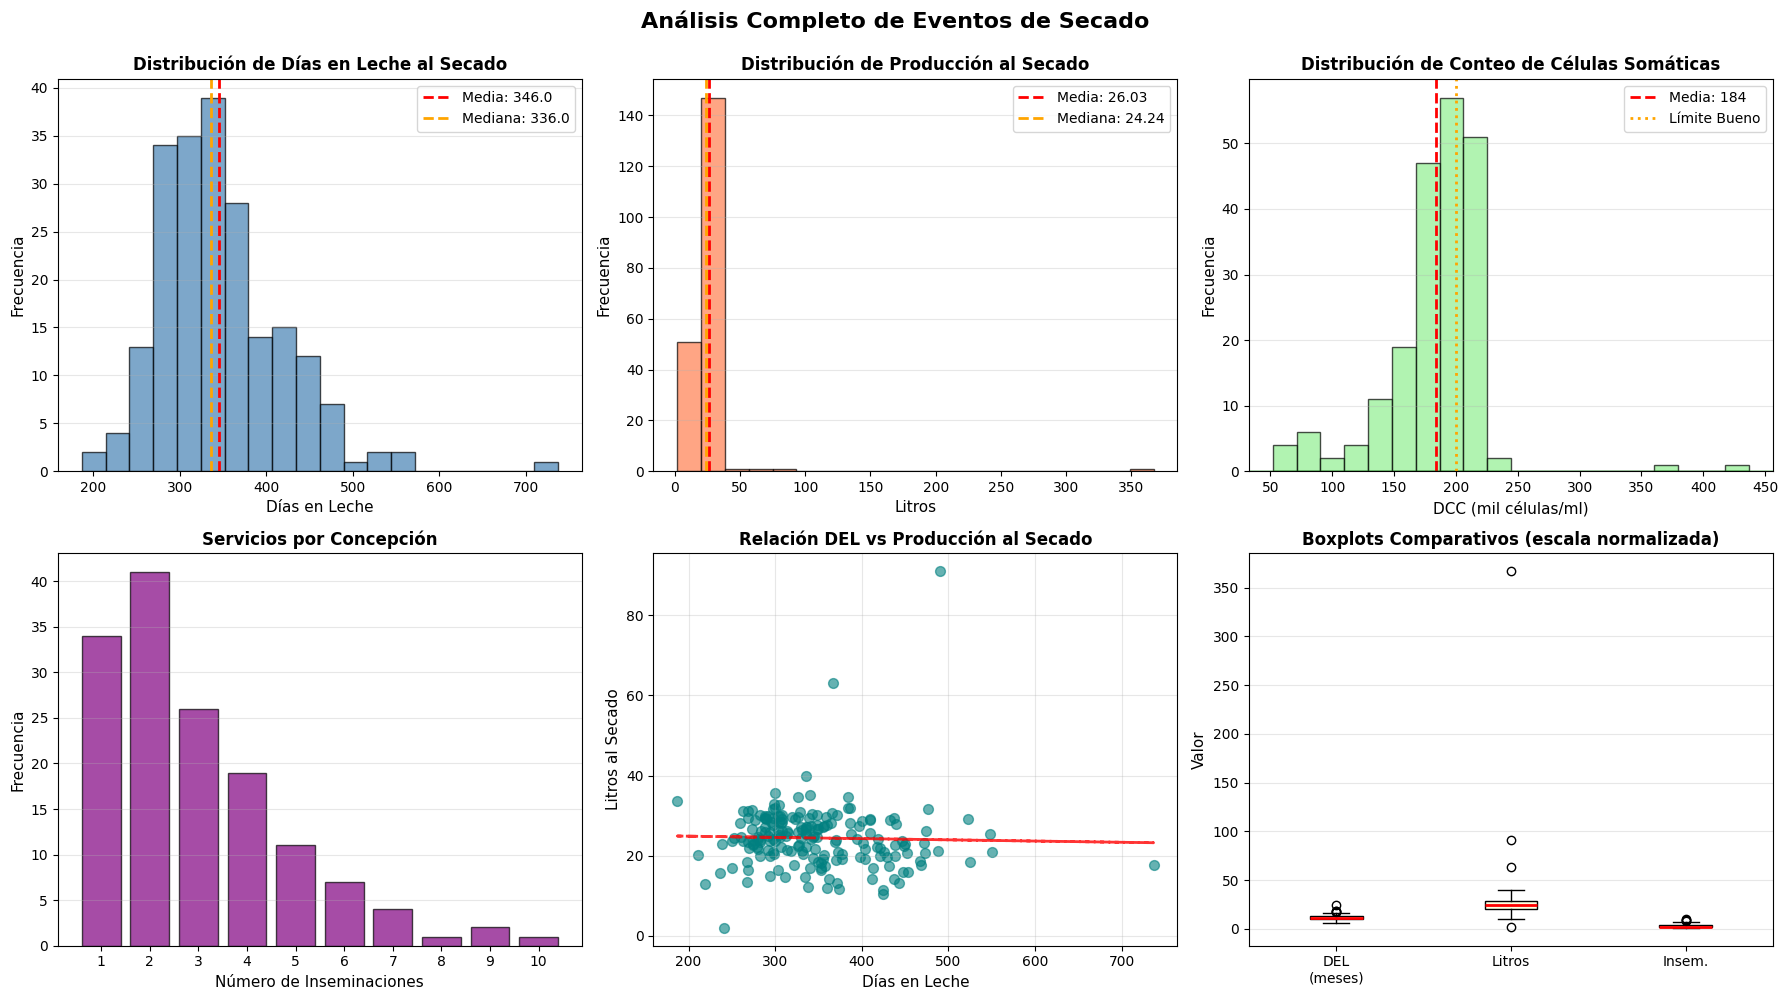


 Datos procesados. Columnas agregadas: DEL_extraido, Litros_extraido, DCC_extraido, Num_Inseminaciones


In [ ]:
secados = analysis[analysis['Tipo de evento'].isin(['Secado'])]

if len(secados) > 0:
    print("\n" + "="*80)
    print("ANÁLISIS DETALLADO DE SECADOS")
    print("="*80)
    print(f"Total de secados: {len(secados)}")

    if 'Comentario' in secados.columns:
        # Función para extraer información de manera más robusta
        def extraer_info_secado(comentario):
            """Extrae DEL, litros, DCC e inseminaciones del comentario"""
            if pd.isna(comentario):
                return pd.Series([np.nan, np.nan, np.nan, np.nan])

            comentario = str(comentario).upper()  # Convertir a mayúsculas para uniformidad

            # Extraer DEL (Días en Leche)
            del_match = re.search(r'(\d+)\s*(?:DEL|DIAS EN LECHE)', comentario)
            dias_leche = float(del_match.group(1)) if del_match else np.nan

            # Extraer LITROS (puede estar como LTS, LITROS, L)
            litros_match = re.search(r'(\d+\.?\d*)\s*(?:LITROS?|LTS?)\b', comentario)
            litros = float(litros_match.group(1)) if litros_match else np.nan

            # Extraer DCC (Conteo de Células Somáticas)
            dcc_match = re.search(r'(\d+)\s*DCC', comentario)
            dcc = float(dcc_match.group(1)) if dcc_match else np.nan

            # Extraer número de inseminaciones
            insem_match = re.search(r'(?:EN LA|A LA)\s*(\d+)\s*INSEM', comentario)
            num_inseminaciones = float(insem_match.group(1)) if insem_match else np.nan

            return pd.Series([dias_leche, litros, dcc, num_inseminaciones])

        secados[['DEL_extraido', 'Litros_extraido', 'DCC_extraido', 'Num_Inseminaciones']] = \
            secados['Comentario'].apply(extraer_info_secado)

        print("\n--- ESTADÍSTICAS DE SECADO ---")

        # Días en Leche
        del_validos = secados['DEL_extraido'].dropna()
        if len(del_validos) > 0:
            print(f"\n Días en Leche (DEL):")
            print(f"   - Promedio: {del_validos.mean():.1f} días")
            print(f"   - Mediana: {del_validos.median():.1f} días")
            print(f"   - Mínimo: {del_validos.min():.0f} días")
            print(f"   - Máximo: {del_validos.max():.0f} días")
            print(f"   - Desviación estándar: {del_validos.std():.1f} días")
            print(f"   - Datos válidos: {len(del_validos)}/{len(secados)} ({len(del_validos)/len(secados)*100:.1f}%)")

        # Litros
        litros_validos = secados['Litros_extraido'].dropna()
        if len(litros_validos) > 0:
            print(f"\n Producción al Secado:")
            print(f"   - Promedio: {litros_validos.mean():.2f} litros")
            print(f"   - Mediana: {litros_validos.median():.2f} litros")
            print(f"   - Mínimo: {litros_validos.min():.2f} litros")
            print(f"   - Máximo: {litros_validos.max():.2f} litros")
            print(f"   - Desviación estándar: {litros_validos.std():.2f} litros")
            print(f"   - Datos válidos: {len(litros_validos)}/{len(secados)} ({len(litros_validos)/len(secados)*100:.1f}%)")

        # DCC (Conteo de Células Somáticas)
        dcc_validos = secados['DCC_extraido'].dropna()
        if len(dcc_validos) > 0:
            print(f"\n Conteo de Células Somáticas (DCC):")
            print(f"   - Promedio: {dcc_validos.mean():.0f} mil células/ml")
            print(f"   - Mediana: {dcc_validos.median():.0f} mil células/ml")
            print(f"   - Mínimo: {dcc_validos.min():.0f} mil células/ml")
            print(f"   - Máximo: {dcc_validos.max():.0f} mil células/ml")
            print(f"   - Desviación estándar: {dcc_validos.std():.1f} mil células/ml")
            print(f"   - Datos válidos: {len(dcc_validos)}/{len(secados)} ({len(dcc_validos)/len(secados)*100:.1f}%)")

            # Clasificación de calidad de leche según DCC
            print(f"\n   Clasificación por calidad (DCC):")
            print(f"   - Excelente (<100): {(dcc_validos < 100).sum()} ({(dcc_validos < 100).sum()/len(dcc_validos)*100:.1f}%)")
            print(f"   - Buena (100-200): {((dcc_validos >= 100) & (dcc_validos < 200)).sum()} ({((dcc_validos >= 100) & (dcc_validos < 200)).sum()/len(dcc_validos)*100:.1f}%)")
            print(f"   - Regular (200-400): {((dcc_validos >= 200) & (dcc_validos < 400)).sum()} ({((dcc_validos >= 200) & (dcc_validos < 400)).sum()/len(dcc_validos)*100:.1f}%)")
            print(f"   - Mala (>400): {(dcc_validos >= 400).sum()} ({(dcc_validos >= 400).sum()/len(dcc_validos)*100:.1f}%)")

        # Número de Inseminaciones
        insem_validos = secados['Num_Inseminaciones'].dropna()
        if len(insem_validos) > 0:
            print(f"\n Servicios por Concepción:")
            print(f"   - Promedio: {insem_validos.mean():.2f} inseminaciones")
            print(f"   - Mediana: {insem_validos.median():.1f} inseminaciones")
            print(f"   - Mínimo: {insem_validos.min():.0f} inseminaciones")
            print(f"   - Máximo: {insem_validos.max():.0f} inseminaciones")
            print(f"   - Desviación estándar: {insem_validos.std():.2f} inseminaciones")
            print(f"   - Datos válidos: {len(insem_validos)}/{len(secados)} ({len(insem_validos)/len(secados)*100:.1f}%)")

            # Distribución de servicios
            print(f"\n   Distribución de servicios:")
            for i in range(1, int(insem_validos.max()) + 1):
                count = (insem_validos == i).sum()
                pct = count / len(insem_validos) * 100
                print(f"   - {i} inseminación{'es' if i > 1 else ''}: {count} vacas ({pct:.1f}%)")

        # Mostrar algunos ejemplos de extracción
        print("\n--- EJEMPLOS DE EXTRACCIÓN ---")
        ejemplos = secados[['Comentario', 'DEL_extraido', 'Litros_extraido', 'DCC_extraido', 'Num_Inseminaciones']].head(10)
        print(ejemplos.to_string(index=False))

        # VISUALIZACIONES
        import matplotlib.pyplot as plt
        import seaborn as sns

        fig, axes = plt.subplots(2, 3, figsize=(18, 10))

        # 1. Histograma de DEL
        if len(del_validos) > 0:
            axes[0, 0].hist(del_validos, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
            axes[0, 0].axvline(del_validos.mean(), color='red', linestyle='--', linewidth=2,
                              label=f'Media: {del_validos.mean():.1f}')
            axes[0, 0].axvline(del_validos.median(), color='orange', linestyle='--', linewidth=2,
                              label=f'Mediana: {del_validos.median():.1f}')
            axes[0, 0].set_xlabel('Días en Leche', fontsize=11)
            axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
            axes[0, 0].set_title('Distribución de Días en Leche al Secado', fontweight='bold')
            axes[0, 0].legend()
            axes[0, 0].grid(True, alpha=0.3, axis='y')

        # 2. Histograma de Litros
        if len(litros_validos) > 0:
            axes[0, 1].hist(litros_validos, bins=20, color='coral', edgecolor='black', alpha=0.7)
            axes[0, 1].axvline(litros_validos.mean(), color='red', linestyle='--', linewidth=2,
                              label=f'Media: {litros_validos.mean():.2f}')
            axes[0, 1].axvline(litros_validos.median(), color='orange', linestyle='--', linewidth=2,
                              label=f'Mediana: {litros_validos.median():.2f}')
            axes[0, 1].set_xlabel('Litros', fontsize=11)
            axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
            axes[0, 1].set_title('Distribución de Producción al Secado', fontweight='bold')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3, axis='y')

        # 3. Histograma de DCC
        if len(dcc_validos) > 0:
            axes[0, 2].hist(dcc_validos, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
            axes[0, 2].axvline(dcc_validos.mean(), color='red', linestyle='--', linewidth=2,
                              label=f'Media: {dcc_validos.mean():.0f}')
            axes[0, 2].axhline(y=0, xmin=0, xmax=200, color='green', linestyle='-', linewidth=2, alpha=0.3)
            axes[0, 2].axvline(200, color='orange', linestyle=':', linewidth=2, label='Límite Bueno')
            axes[0, 2].set_xlabel('DCC (mil células/ml)', fontsize=11)
            axes[0, 2].set_ylabel('Frecuencia', fontsize=11)
            axes[0, 2].set_title('Distribución de Conteo de Células Somáticas', fontweight='bold')
            axes[0, 2].legend()
            axes[0, 2].grid(True, alpha=0.3, axis='y')

        # 4. Barplot de Número de Inseminaciones
        if len(insem_validos) > 0:
            insem_counts = insem_validos.value_counts().sort_index()
            axes[1, 0].bar(insem_counts.index, insem_counts.values, color='purple', alpha=0.7, edgecolor='black')
            axes[1, 0].set_xlabel('Número de Inseminaciones', fontsize=11)
            axes[1, 0].set_ylabel('Frecuencia', fontsize=11)
            axes[1, 0].set_title('Servicios por Concepción', fontweight='bold')
            axes[1, 0].grid(True, alpha=0.3, axis='y')
            axes[1, 0].set_xticks(insem_counts.index)

        # 5. Relación DEL vs Litros
        if len(del_validos) > 0 and len(litros_validos) > 0:
            datos_completos = secados[['DEL_extraido', 'Litros_extraido']].dropna()
            if len(datos_completos) > 0:
                axes[1, 1].scatter(datos_completos['DEL_extraido'], datos_completos['Litros_extraido'],
                                  alpha=0.6, s=50, color='teal')
                axes[1, 1].set_xlabel('Días en Leche', fontsize=11)
                axes[1, 1].set_ylabel('Litros al Secado', fontsize=11)
                axes[1, 1].set_title('Relación DEL vs Producción al Secado', fontweight='bold')
                axes[1, 1].grid(True, alpha=0.3)

                # Agregar línea de tendencia
                z = np.polyfit(datos_completos['DEL_extraido'], datos_completos['Litros_extraido'], 1)
                p = np.poly1d(z)
                axes[1, 1].plot(datos_completos['DEL_extraido'], p(datos_completos['DEL_extraido']),
                               "r--", alpha=0.8, linewidth=2)

        # 6. Boxplots comparativos
        boxplot_data = []
        labels = []
        if len(del_validos) > 0:
            boxplot_data.append(del_validos / 30)  # Convertir a meses
            labels.append('DEL\n(meses)')
        if len(litros_validos) > 0:
            boxplot_data.append(litros_validos)
            labels.append('Litros')
        if len(insem_validos) > 0:
            boxplot_data.append(insem_validos)
            labels.append('Insem.')

        if boxplot_data:
            bp = axes[1, 2].boxplot(boxplot_data, labels=labels, patch_artist=True,
                                    boxprops=dict(facecolor='lightyellow'),
                                    medianprops=dict(color='red', linewidth=2))
            axes[1, 2].set_ylabel('Valor', fontsize=11)
            axes[1, 2].set_title('Boxplots Comparativos (escala normalizada)', fontweight='bold')
            axes[1, 2].grid(True, alpha=0.3, axis='y')

        plt.suptitle('Análisis Completo de Eventos de Secado', fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

        # Guardar el dataframe procesado
        print(f"\n Datos procesados. Columnas agregadas: DEL_extraido, Litros_extraido, DCC_extraido, Num_Inseminaciones")

        # Retornar el dataframe procesado para análisis posteriores
        secados_procesado = secados[['Fecha del evento', 'Comentario', 'DEL_extraido',
                                      'Litros_extraido', 'DCC_extraido', 'Num_Inseminaciones']].copy()

    else:
        print(" No se encontró la columna 'Comentario' en los datos de secado")
else:
    print(" No se encontraron eventos de secado en los datos")
